<a href="https://colab.research.google.com/github/seraffin/FailOmen/blob/master/Pola/Workspace_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
!ls
!cd '/content/gdrive/My Drive/FailOmen'

gdrive	sample_data


In [0]:
import pandas as pd

#Importing dataset
dataset = pd.read_csv('/content/gdrive/My Drive/FailOmen/convertDataToML.csv', index_col=False)

In [0]:
x = dataset.iloc[:, 0:23739].values
y = dataset.iloc[:, 23739:24281].values

In [10]:
failCount = 0
passCount = 0
failBuildCount = 0

for a in y:
  if a[np.argmin(a)] == 0 : failBuildCount += 1
  for b in a:
    if b == 0 : failCount += 1
    if b == 1 : passCount += 1
print (failBuildCount)
print (failCount)
print (passCount)
print (failCount / passCount * 100, '%', sep='')

632
973
2607673
0.037312960635785236%


## **UTILITIES:**


---

In [0]:
def count_distribution(prediction):
  #Distributions of argmins through all the predictions
  i = 1
  tab = [0] * 542
  for a in prediction:
    j = 0
    for b in a:
      if b < 1.0 : j = j + 1

    #print (i, '. ', j, np.argmin(a))
    tab[np.argmin(a)] += 1
    i = i + 1

  i = 0
  number_of_tests =  542
  distributed_array = [0 for iterator in range(number_of_tests)]
  for a in tab:
    if a > 0 : 
      pass
#       print ('position', i, '\targmin count', a)
      distributed_array[i] = a
    i += 1
#   print (i)
  create_plot(range(len(distributed_array)), distributed_array)  
  return distributed_array


In [0]:
def create_plot(x_data, y_data=0):
  import matplotlib.pyplot as plt
  if y_data == 0:  
    unzip = list(zip(*x_data))
    x_data, y_data = unzip[0],unzip[1]
    print (x_data)
    print ("\n", y_data)
  
  plt.bar(x_data, y_data, align='center', alpha=1, width = 3)
  plt.xlabel("test no")
  plt.ylabel("how many times test was predicted as probably failed")
  plt.show()

uwaga, w funkcji ponizej searchForFailed(), w wyborze dodania spassowanych testow do trainig/testing set-a, mino ze podajemy dokladny procent z spassowanych danych jaki chcemy wykorzysatc, procet ten moze sie roznic w rzeczywistosci. Spowodowane jest to warunkiem modulo, np 20% bedzie 20%, 90% bedzie 100% 

 

In [0]:
def searchForFailed(yList, percent_of_passed_data=20, withpassed_data=False): 
  changedRowList = []
  period_counter_for_passedData = 0
  for row in range (len(yList)):
    if 0 in yList[row]:
      changedRowList.append(row)
      continue
    elif withpassed_data == True:
      try:
        modulo_arg = int(1/(percent_of_passed_data/100))
      except:
        withpassed_data = False
        continue
      if not (period_counter_for_passedData%modulo_arg):
        changedRowList.append(row)
    period_counter_for_passedData += 1
      
  return changedRowList

def returnFailedData(xList, yList, changedRowList):
  xFailed = []
  yFailed = []
  
  for row in changedRowList:
    xFailed.append(xList[row])
    yFailed.append(yList[row])
  xFailed = np.array(xFailed)
  yFailed = np.array(yFailed)
  return xFailed, yFailed

In [0]:
def failsCount():
  fala = 0
  for i, a in enumerate(yTest):
    j = 0
    for k, b in enumerate(a):
      if b < 1.0 : j += 1

    if j > 0 : 
      print (i, '. ', j)
    i = i + 1
    fala += j
  print (fala)

In [0]:
# Evaluation function

def evaluation(predictions,additionalPredictions, refYsupervisor):
  
  lenght = len(refYsupervisor)

  failPositions = [[] for y in range(lenght)]

  for i, a in enumerate(refYsupervisor):

    for j, b in enumerate(a):
      if b == 0 : failPositions[i].append(j);#spisuje w listach(per commit) pozycje, gdzie sfailowal test [3,78,90, itp]

  predictionsTemp = predictions.copy()#tablica list, w ktotej sa przedstawione prawd wystapienia danej labeliki
  # todo 
  #prediction_real byl juz listo po powrotnym mapowaniu, zlozona z testow (czyli ich indeksami 1-542)do sailowania , od najbardziej prawdopodobnych do najmniej 
  
  
#   print(predictionsTemp) 
#   print(type(predictionsTemp))
#   print(len(predictionsTemp))
#   print(predictionsTemp[0])
#   print(predictionsTemp[0][0])
  predictionPositions = [[] for y in range(lenght)]


  for i, commit in enumerate(predictionsTemp):

    if len(failPositions[i]) != 0:#jezeli w danym commicie byl wh jakis blad
      for j in range(len(failPositions[i]) + additionalPredictions):#tyle razy co sfailowanych testow + dodatkowe, przez nas zdefiniowane
        argmin = np.argmin(commit)# argmin = jest indeksem najmniejsza wartoscia dla predykcji sieci , czyt. indexem najbardziej prawdopodobnej
        predictionPositions[i].append(argmin)#umiesc index tej  najbardziej prawdopodobna wartosc, w tab dla danego komitu 
        predictionsTemp[i][argmin] = 1#nie berz pod uwage juz tej wartosci

  predictionHits = [[] for y in range(lenght)]

  for i, a in enumerate(failPositions):
    count = 0
    for j, b in enumerate(a):


      for c in predictionPositions[i]:
  #      predictionHits[i].append(predictions[i][c].copy())
  #      print(predictions[i][c])
  #      print(predictions[i][c])
  #      print (b, c)
        if c == b : count += 1

    if len(failPositions) != 0:
      predictionHits[i].insert(0,count)


  failsCount = 0
  hitsCount = 0
  for i, a in enumerate(refYsupervisor):
    j = 0

    for k, b in enumerate(a):
      if b < 1.0 : j += 1

  #  if j > 0 :
  #    print (i, '.', j, predictionHits[i])


    failsCount += j
    hitsCount += predictionHits[i][0]

  print('Percentage of fails predicted', hitsCount / failsCount * 100, '%')

In [0]:
def listSingleMemberClassesPositions(refY, printFlag):

  yList = refY.tolist()
  print (len(yList))
  yDistinct = [ele for ind, ele in enumerate(yList) if ele not in yList[:ind]]

  classesPopulation = []
  singleMemberClassesPositions = []
  noSingleMemberClasses = 0

  for i, a in enumerate(yDistinct):
    population = 0
    memberPosition = 0
    for j, b in enumerate(yList):
      if a == b: 
        population += 1
        memberPosition = j

    classesPopulation.append(population)
  #  print(i, population)
    if population == 1: 
      noSingleMemberClasses += 1
      singleMemberClassesPositions.append(memberPosition)

  if printFlag == True: 
    print(noSingleMemberClasses)
  else:
    return singleMemberClassesPositions
  




---



---



---



## **PREPARE DATA**

**(optional) create only 'failed data'**

In [0]:
import numpy
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y,percent_of_passed_data=1,withpassed_data=True))


In [84]:
def count_fail_to_pass_ratio(refy):
  failCount = 0
  passCount = 0
  failBuildCount = 0

  for a in y:
    if a[np.argmin(a)] == 0 : failBuildCount += 1
  print ("To training were used data : ")
  print ("failed builds: ", failBuildCount)
  passed_builds = len(refy) - failBuildCount
  print('passed builds: ', passed_builds)
  try:
    print ("failed to passed  ratio: ", failBuildCount / passed_builds * 100, '%', sep='')
  except :
    print ("only failed data")
  
  
# count_fail_to_pass_ratio(yReduced)
  

  
  

To training were used data : 
failed builds:  632
passed builds:  0
only failed data




---



---



---



## PREPARE MODEL

In [92]:
from sklearn import cross_validation, grid_search
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import svm

import numpy
xReduced, yReduced = returnFailedData(x, y, searchForFailed(y,percent_of_passed_data=0,withpassed_data=False))# bez danych spassowanych

#################################-- MAPOWANIE MACIERZY NA WEKTOR --#################################################################
#select real classes
yReduced_temp = yReduced.tolist()
real_classes = [(ele) for ind, ele in enumerate(yReduced_temp) if ele not in yReduced_temp[:ind]]#takie klasy mozna wyroznic z supervisora dla danych testowych np [1,0,0,0,1....] inna klasa jest [0,0,0,1,0,1...] itp. 


# create svm_labels
svm_labels = []
for i in range(542):
  svm_labels.append(float(i))#tworzenie labelek do svm, narazie nie polaczonych z prawdziwymi danymi

# create mapper
class_mapper = [tuple((real_class, svm_labels[i])) for i, real_class in enumerate(real_classes)]#mapper ktory przypozadkowuje prawdziwym klasom klasy svm np klasa [1,0,0,0,1....] dostaje klase svm 0, itd.


# create new supervisor  
temp_mapped_supervisor = []  
for real_row in yReduced_temp:
  for mapper_row in class_mapper:
    if real_row == mapper_row[0]:
      temp_mapped_supervisor.append(mapper_row[1])# klasy svm przypisane do wiersz danych tesowych np xReduced[0] ma supervisora = 0,  xReduced[123] ma supervisora = 7
print(temp_mapped_supervisor)      
#map supervisor to numpy.array      
mapped_supervisor=numpy.array([numpy.array(xi) for xi in temp_mapped_supervisor])#przekonvertowanie na numpy array
# print(mapped_supervisor[123])

print("tyle wystapien klasy n w danych treningowych: ",len([ele for ele in mapped_supervisor if ele == 155]))
print ("tyle wierszy w danych treningowych: ", len(mapped_supervisor))
print ("tyle klas znaleziono w danych treningowych: ", len(set(mapped_supervisor)))
####################################################################################################################################
    

# xReduced, yReduced = returnFailedData(x, y, searchForFailed(y))
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xReduced, mapped_supervisor, test_size = 0.2, random_state=77)
# print(np.shape(xTrain))
# print(np.shape(yTrain))


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 2.0, 26.0, 14.0, 27.0, 28.0, 28.0, 28.0, 29.0, 5.0, 28.0, 28.0, 28.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 24.0, 36.0, 37.0, 38.0, 39.0, 40.0, 24.0, 41.0, 42.0, 15.0, 15.0, 43.0, 24.0, 44.0, 15.0, 15.0, 15.0, 44.0, 15.0, 15.0, 45.0, 15.0, 15.0, 44.0, 46.0, 12.0, 20.0, 47.0, 48.0, 49.0, 50.0, 24.0, 51.0, 12.0, 52.0, 24.0, 53.0, 54.0, 55.0, 42.0, 24.0, 31.0, 31.0, 56.0, 57.0, 24.0, 5.0, 24.0, 5.0, 20.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 64.0, 65.0, 32.0, 32.0, 53.0, 53.0, 53.0, 53.0, 53.0, 7.0, 7.0, 7.0, 24.0, 66.0, 24.0, 24.0, 24.0, 9.0, 9.0, 67.0, 67.0, 68.0, 66.0, 66.0, 66.0, 69.0, 33.0, 66.0, 70.0, 66.0, 24.0, 71.0, 72.0, 72.0, 73.0, 24.0, 33.0, 74.0, 24.0, 75.0, 75.0, 66.0, 37.0, 76.0, 31.0, 77.0, 24.0, 24.0, 12.0, 12.0, 12.0, 12.0, 12.0, 78.0, 47.0, 53.0,

In [87]:

# mala gamma  -  odlegle punkty, od potencjalnej garnicy , maja wplyw na ustawienie granicy (decision boundary)  => moze powodobac niedopasownie
# duza gamma -  tylko bliskie punkty, od potencjalnej garnicy , maja wplyw na ustawienie granicy (decision boundary) => moze powodowac overfiting
clf = svm.SVC(gamma=0.01,probability=True)#gamma 0.0001
# clf = svm.SVC(gamma=0.01,probability=False)#gamma 0.0001
clf.fit(xTrain, yTrain) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)



---



---



---



## **TEST MODEL**

In [109]:

# predictions = model.predict(xTest)
predictions = clf.predict(xTest)
print (predictions[0])
print(len(predictions))
print(predictions)
proba_predictions = clf.predict_proba(xTest)
print (proba_predictions)

from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(xTest,  yTest))


155.0
127
[155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 151. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155.  28. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155. 155.
 155. 155. 155. 155. 155. 155. 155. 106. 155. 155. 155. 155. 155. 155.
 155.]
[[0.00276122 0.00331438 0.00269617 ... 0.00271375 0.00302195 0.00374291]
 [0.00268143 0.00264582 0.00283622 ... 0.00269449 0.00272802 0.00269093]
 [0.0027218  0.00274252 0.00271498 ... 0.00268971 0.00290807 0.00336094]
 ...
 [0.00276292 0.00331617 0.00269756 ... 0.00271542 0.00302327 0.00374477]
 [0.0030947  0.00335076 0.00303791 ... 0.003067

[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 82, 0, 0, 127, 0, 0, 0, 98, 0, 0, 0, 0, 127, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 107, 0, 75, 0, 0, 0, 0, 127, 0, 0, 0, 127, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

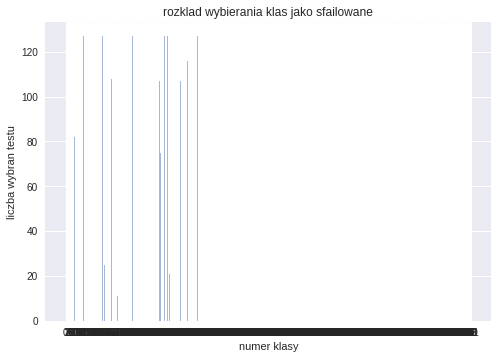

In [118]:
#jakie klasy byly naczesciej(znajdowaly sie w pierwszej 15 najbardziej prawdopodobnych) wybierane
char_data = [0 for svm_class in svm_labels] 
i = 0
for prob_prediction in proba_predictions:
  pair_prob_prediction = [(idx, element) for idx, element in enumerate(prob_prediction)]
  sorted_prob_prediction = list(prob_prediction)
  pair_prob_prediction_sorted = sorted(pair_prob_prediction, key=lambda ele: ele[1])
  best_pred = pair_prob_prediction_sorted[-15:]
  for pred_class in best_pred:
    char_data[pred_class[0]] += 1
   
#   if i == 2 : break
    
print(char_data)    
y_pos = range(len(svm_labels))
performance = char_data
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos)
plt.ylabel('liczba wybran testu')
plt.xlabel('numer klasy')
plt.title('rozklad wybierania klas jako sfailowane')
plt.show()


  